In [1]:
import pandas as pd

In [2]:
df1 = pd.read_excel("CAPEX L9.xlsx")
df1.tail()

,Sr.No.,Accord Code,Company Name,GB+CWIP_1Y_CAGR,GB+CWIP_2Y_CAGR,GB+CWIP_3y_CAGR,FH_Market Capitalization,CONS_FH_1
46,47,100420,Torrent Pharmaceuticals Ltd.,116.015147,64.316748,47.583569,19646.225400,C
47,48,107747,TTK Healthcare Ltd.,55.635931,36.849949,27.052910,722.236419,S
48,49,190005,Veedol Corporation Ltd.,50.636884,14.725751,10.600961,1147.415000,C
49,50,222584,Zee Learn Ltd.,22.878255,49.007667,72.511841,1158.403620,C
50,51,132794,Zee Media Corporation Ltd.,291.083302,134.181494,82.344664,641.005500,C


In [3]:
df1["GB+CWIP_CAPEX_SUM"] = df1["GB+CWIP_1Y_CAGR"] + df1["GB+CWIP_2Y_CAGR"] + df1["GB+CWIP_3y_CAGR"]

print("mean std for cagr")
mean_value = df1['GB+CWIP_CAPEX_SUM'].mean()
print(mean_value)
std_dev = df1['GB+CWIP_CAPEX_SUM'].std()
print(std_dev)

df1['ZSCORE_CAPEX'] = (df1['GB+CWIP_CAPEX_SUM']-mean_value) / std_dev

print("mean std for mcap")
mean_value = df1['FH_Market Capitalization'].mean()
print(mean_value)
std_dev = df1['FH_Market Capitalization'].std()
print(std_dev)

df1['ZSCORE_MCAP'] = (df1['FH_Market Capitalization']-mean_value) / std_dev

df1.tail()

mean std for cagr
278.27009958332167
274.3045296618311
mean std for mcap
4003.668499773039
4511.126834359791


,Sr.No.,Accord Code,Company Name,GB+CWIP_1Y_CAGR,GB+CWIP_2Y_CAGR,GB+CWIP_3y_CAGR,FH_Market Capitalization,CONS_FH_1,GB+CWIP_CAPEX_SUM,ZSCORE_CAPEX,ZSCORE_MCAP
46,47,100420,Torrent Pharmaceuticals Ltd.,116.015147,64.316748,47.583569,19646.225400,C,227.915464,-0.183572,3.467550
47,48,107747,TTK Healthcare Ltd.,55.635931,36.849949,27.052910,722.236419,S,119.538790,-0.578668,-0.727409
48,49,190005,Veedol Corporation Ltd.,50.636884,14.725751,10.600961,1147.415000,C,75.963595,-0.737525,-0.633157
49,50,222584,Zee Learn Ltd.,22.878255,49.007667,72.511841,1158.403620,C,144.397763,-0.488043,-0.630722
50,51,132794,Zee Media Corporation Ltd.,291.083302,134.181494,82.344664,641.005500,C,507.609460,0.836076,-0.745415


In [4]:
df2 = pd.read_excel("TRENDLYNE_230425.xlsx")
df2.head()

,Stock Name,NSE Code,BSE Code,Stock Code,ISIN,Industry Name,Current Price,Current Price.1,Market Capitalization,PE TTM Price to Earnings,...,Sector Return on Equity ROE,Industry Return on Equity ROE,RoA Annual %,Sector Return on Assets,Industry Return on Assets,Piotroski Score,sector_name,Industry Name.1,Latest financial result,Result Announced Date
0,20 Microns Ltd.,20MICRONS,533022.0,20MICRONS,INE144J01027,Coal & Mining,227.25,227.25,801.89,13.19,...,23.96,38.63,9.50,10.88,17.60,7.0,Metals & Mining,Coal & Mining,2024-12-31,2025-01-22
1,360 ONE Gold ETF,GOLD360,544375.0,GOLD360,INF579M01BB5,Others,95.45,95.45,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Others,Others,NaT,NaT
2,360 ONE Silver ETF,SILVER360,544389.0,SILVER360,INF579M01BC3,Others,99.20,99.20,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Others,Others,NaT,NaT
3,360 One Wam Ltd.,360ONE,542772.0,360ONE,INE466L01038,Capital Markets,1057.00,1057.00,41613.87,41.27,...,17.25,23.88,5.31,2.86,8.70,3.0,Banking and Finance,Capital Markets,2024-12-31,2025-04-23
4,3B BlackBio Dx Ltd.,NaN,532067.0,3BBLACKBIO,INE994E01018,Agrochemicals,1784.05,1784.05,1531.20,31.87,...,14.53,17.06,12.93,9.90,12.59,7.0,Chemicals & Petrochemicals,Agrochemicals,2024-12-31,2025-02-13


In [5]:
merged_df = pd.merge(df1, df2, how='inner', left_on='Company Name', right_on='Stock Name')
merged_df.head()

,Sr.No.,Accord Code,Company Name,GB+CWIP_1Y_CAGR,GB+CWIP_2Y_CAGR,GB+CWIP_3y_CAGR,FH_Market Capitalization,CONS_FH_1,GB+CWIP_CAPEX_SUM,ZSCORE_CAPEX,...,Sector Return on Equity ROE,Industry Return on Equity ROE,RoA Annual %,Sector Return on Assets,Industry Return on Assets,Piotroski Score,sector_name,Industry Name.1,Latest financial result,Result Announced Date
0,1,207778,Ashoka Buildcon Ltd.,181.524650,153.964218,85.331322,2834.657342,C,420.820191,0.519678,...,12.67,10.32,2.63,5.35,3.73,8.0,Cement and Construction,Roads & Highways,2024-12-31,2025-02-10
1,2,132830,Astral Ltd.,87.866511,57.239404,47.658715,5244.753150,C,192.764630,-0.311717,...,21.36,16.41,12.14,11.85,12.30,6.0,General Industrials,Plastic Products,2024-12-31,2025-01-30
2,3,106197,Bliss GVS Pharma Ltd.,10.136397,19.262895,60.786405,1330.596300,C,90.185697,-0.685677,...,16.90,17.11,6.21,11.67,11.81,7.0,Pharmaceuticals & Biotechnology,Pharmaceuticals,2024-12-31,2025-01-28
3,4,205759,Cigniti Technologies Ltd.,58.784728,66.441118,51.803513,1065.765555,C,177.029360,-0.369082,...,31.36,33.12,16.46,19.49,20.52,6.0,Software & Services,IT Consulting & Software,2024-12-31,2025-05-05
4,5,132175,Cyient Ltd.,69.154788,34.421193,26.595478,5658.503233,C,130.171460,-0.539906,...,31.36,33.12,9.74,19.49,20.52,7.0,Software & Services,IT Consulting & Software,2024-12-31,2025-04-24


In [6]:
df3 = pd.read_excel("C:/Users/meets/AVENTUS_FACTOR-MODEL/SIMPLE STRATEGY/L9 Valuation Data.xlsx")

final_merged_df = pd.merge(merged_df, df3, how='inner', left_on='Company Name', right_on='Company Name')
final_merged_df.head()

mean_value = final_merged_df['FR_Adjusted PE (x)'].mean()
std_dev = final_merged_df['FR_Adjusted PE (x)'].std()
final_merged_df['ZSCORE_PE'] = (final_merged_df['FR_Adjusted PE (x)']-mean_value) / std_dev

mean_value = final_merged_df['FR_EV/EBITDA(x)'].mean()
std_dev = final_merged_df['FR_EV/EBITDA(x)'].std()
final_merged_df['ZSCORE_EVEBITDA'] = (final_merged_df['FR_EV/EBITDA(x)']-mean_value) / std_dev

final_merged_df['ZSCORE_FINAL'] = (0.6 * final_merged_df['ZSCORE_CAPEX']) + (0.2 * final_merged_df['ZSCORE_MCAP']) + (0.10 * final_merged_df['ZSCORE_PE']) + (0.10 * final_merged_df['ZSCORE_EVEBITDA'])
# final_merged_df['ZSCORE_FINAL'] = (1 * final_merged_df['ZSCORE_CAPEX'])



final_merged_df = final_merged_df[final_merged_df["ZSCORE_FINAL"]>0]

# final_merged_df['PORTFOLIO_WEIGHTS'] = final_merged_df["ZSCORE_FINAL"]/final_merged_df["ZSCORE_FINAL"].sum()

column_list = final_merged_df['Stock Code'].tolist()
# print(column_list)

final_merged_df.head(5)

final_merged_df.to_csv("rahul_s1l9.csv")

In [29]:
df = pd.read_csv("C:/Users/meets/AVENTUS_FACTOR-MODEL/SIMPLE STRATEGY/mega_dateclose_final.csv")
columns_to_keep = ['Date'] + [col for col in column_list if col in df.columns]
filtered_with_date_df = df[columns_to_keep]


filtered_with_date_df['Date'] = pd.to_datetime(filtered_with_date_df['Date'])
start_date = pd.to_datetime("2015-03-31")
end_date = pd.to_datetime("2018-04-02")
filtered_df = filtered_with_date_df[(filtered_with_date_df['Date'] >= start_date) & (filtered_with_date_df['Date'] <= end_date)]
filtered_df.head()


df_cleaned = filtered_df.dropna(how='all', subset=filtered_df.columns.difference(['Date']))
rows_removed = len(filtered_df) - len(df_cleaned)
# print("ROWS REMOVED i.e. ALL VALUES MISSING EXCEPT DATE:", rows_removed)
df_cleaned.head()


df_fully_cleaned = df_cleaned.dropna(axis=1)
final_columns = df_fully_cleaned.columns.tolist()
if 'Date' in final_columns:
    final_columns.remove('Date')
print(final_columns)
df_fully_cleaned.head()


df_fully_cleaned['Date'] = pd.to_datetime(df_fully_cleaned['Date'])
df_fully_cleaned.set_index('Date', inplace=True)
pct_change_df = df_fully_cleaned.pct_change() 
pct_change_df = pct_change_df.iloc[1:] 
pct_change_df.head()
# pct_change_df.to_csv("gptwork.csv",index=False)



pct_change_df = pct_change_df.reset_index()  # This moves 'Date' from index to a regular column
pct_change_df.head()
# pct_change_df.to_csv("data1.csv",index=False)





# pct_change_df.to_csv("deletenow.csv",index=False)
# nan_counts = pct_change_df.isna().sum()
# print(nan_counts)
# columns_without_nans = df.columns[df.isna().sum() == 0].tolist()
# print(columns_without_nans)

# pct_change_df.dropna

['ASHOKA', 'DHANI', 'NAUKRI', 'IRB', 'KIRLOSIND', 'PFIZER', 'PEL', 'SAMMAANCAP', 'SECURKLOUD', 'THOMASCOOK', 'TORNTPHARM', 'ZEEMEDIA']


C:\Users\meets\AppData\Local\Temp\ipykernel_11744\349242484.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_with_date_df['Date'] = pd.to_datetime(filtered_with_date_df['Date'])


,Date,ASHOKA,DHANI,NAUKRI,IRB,KIRLOSIND,PFIZER,PEL,SAMMAANCAP,SECURKLOUD,THOMASCOOK,TORNTPHARM,ZEEMEDIA
0,2015-04-01,0.044776,0.065714,-0.001965,0.018443,0.021789,-0.006121,0.008726,0.027872,0.002061,0.007916,0.031849,0.031073
1,2015-04-06,0.030204,0.026810,0.005249,0.022133,0.003060,0.042680,0.007057,0.000174,0.068076,0.013089,0.039900,0.013699
2,2015-04-07,0.007924,-0.011749,0.000831,-0.007874,0.015251,0.032301,0.017915,-0.022317,0.030292,-0.013390,-0.002413,0.029730
3,2015-04-08,-0.002358,0.011889,-0.021581,0.043651,0.001548,-0.011212,0.000444,-0.005528,-0.005778,0.010714,0.018223,-0.013123
4,2015-04-09,0.008274,-0.011749,-0.019209,-0.003802,-0.045450,-0.015367,0.014040,0.042589,0.091966,0.093051,-0.020589,0.079787


In [30]:
# PORTFOLIO WT CALCULATION

final_df = final_merged_df[final_merged_df['Stock Code'].isin([name.upper() for name in final_columns])]
final_df.head()

final_df['PORTFOLIO_WEIGHTS'] = final_df["ZSCORE_FINAL"]/final_df["ZSCORE_FINAL"].sum()
final_df.head()

final_df = final_df[["Stock Code","PORTFOLIO_WEIGHTS"]]
final_df.head(20)
# final_df.to_csv("data2.csv",index=False)

C:\Users\meets\AppData\Local\Temp\ipykernel_11744\3447757058.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['PORTFOLIO_WEIGHTS'] = final_df["ZSCORE_FINAL"]/final_df["ZSCORE_FINAL"].sum()


,Stock Code,PORTFOLIO_WEIGHTS
0,ASHOKA,0.025198
5,DHANI,0.085131
13,NAUKRI,0.055904
14,IRB,0.057153
19,KIRLOSIND,0.090508
22,PFIZER,0.314223
23,PEL,0.002430
29,SAMMAANCAP,0.059656
30,SECURKLOUD,0.179119
40,THOMASCOOK,0.026821


In [31]:
#DIRECT COPYPASTE - NO EDIT


# Align columns: ensure weights match the columns in the return dataframe
returns_df = pct_change_df.copy()
weights_df = final_df.set_index("Stock Code")["PORTFOLIO_WEIGHTS"]

# Ensure only common stocks are used
common_stocks = returns_df.columns.intersection(weights_df.index)
returns_matrix = returns_df[common_stocks].copy()
weights_vector = weights_df.loc[common_stocks]

# Perform matrix multiplication (dot product) for each date
returns_df["Portfolio Return"] = returns_matrix.dot(weights_vector)

# Show a few results
final_portfolio = returns_df[["Date", "Portfolio Return"]]
final_portfolio.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742 entries, 0 to 741
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              742 non-null    datetime64[ns]
 1   Portfolio Return  742 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 11.7 KB


In [34]:
#DIRECT COPYPASTE - NO EDIT

df2 = pd.read_csv("C:/Users/meets/AVENTUS_FACTOR-MODEL/SIMPLE STRATEGY/BENCHMARK/BSE500_PCTRETURNS_09-25.csv")
df2['BDP_Date'] = pd.to_datetime(df2['BDP_Date'])

final_portfolio_benchmark = pd.merge(final_portfolio, df2, how='inner', left_on='Date', right_on='BDP_Date')
final_portfolio_benchmark = final_portfolio_benchmark.drop('BDP_Date', axis=1)
final_portfolio_benchmark.set_index('Date', inplace=True)
final_portfolio_benchmark = final_portfolio_benchmark.rename(columns={'Portfolio Return':'Strategy'})
final_portfolio_benchmark.head()
# final_portfolio_benchmark.to_csv("s1l9b.csv")
# final_portfolio_benchmark.to_csv("final_portfolio_benchmarkQ.csv")

,Strategy,BDP_Close
Date,,
2015-04-01,0.013259,0.012226
2015-04-06,0.033984,0.009319
2015-04-07,0.015107,0.003053
2015-04-08,-0.001548,0.006583
2015-04-09,0.012293,0.005338


                           Benchmark    Strategy
-------------------------  -----------  ----------
Start Period               2015-04-01   2015-04-01
End Period                 2018-04-02   2018-04-02
Risk-Free Rate             0.0%         0.0%
Time in Market             100.0%       100.0%

Cumulative Return          29.38%       99.99%
CAGR﹪                     6.1%         17.26%

Sharpe                     0.7          1.27
Prob. Sharpe Ratio         88.07%       98.4%
Smart Sharpe               0.6          1.09
Sortino                    0.94         1.86
Smart Sortino              0.81         1.59
Sortino/√2                 0.67         1.31
Smart Sortino/√2           0.57         1.12
Omega                      1.26         1.26

Max Drawdown               -20.37%      -22.2%
Longest DD Days            465          232
Volatility (ann.)          13.82%       20.11%
R^2                        0.48         0.48
Information Ratio          0.07         0.07
Calmar               

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2016-01-05,2016-02-26,2016-08-23,232,-22.199122,-21.560135
2,2016-09-09,2016-11-22,2017-03-16,189,-16.263754,-14.324346
3,2015-04-15,2015-06-12,2015-07-13,90,-12.526100,-12.447933
4,2018-01-25,2018-02-06,2018-04-02,68,-10.401460,-9.248236
5,2015-08-06,2015-08-24,2015-08-26,21,-8.914575,-6.780071


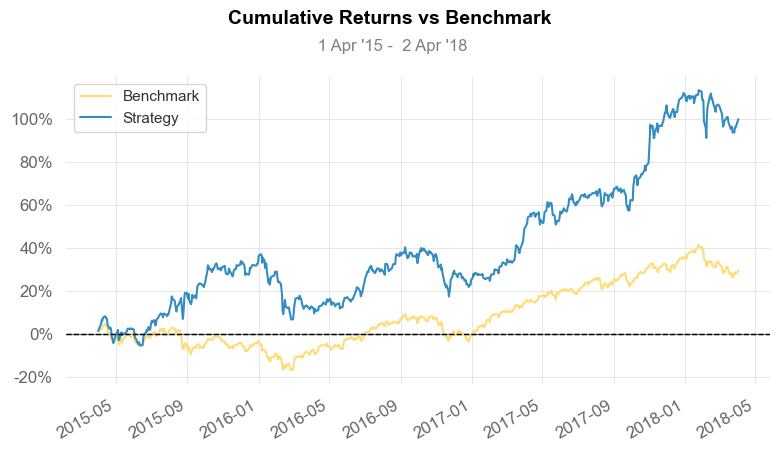

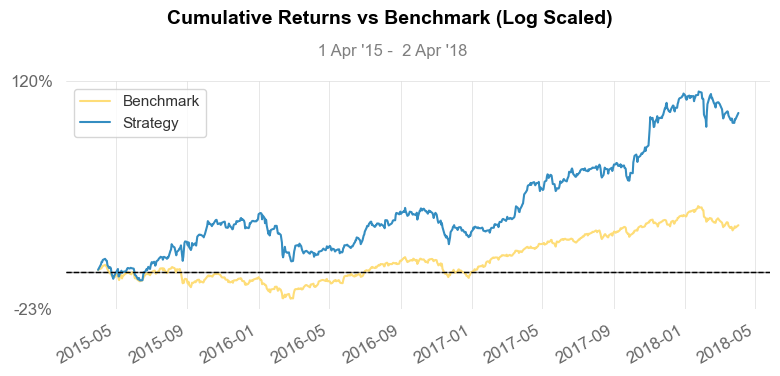

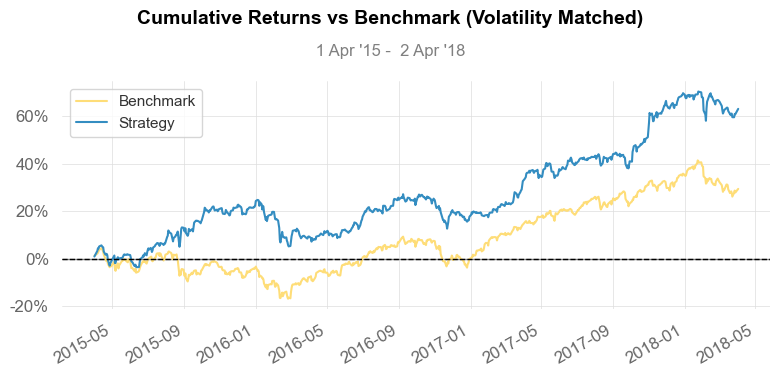

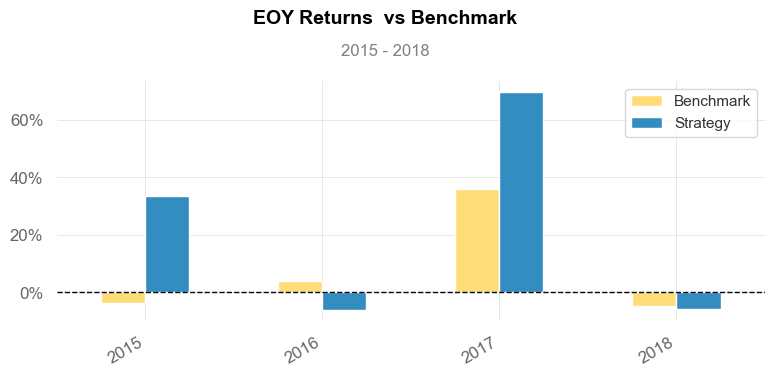

OptionError: No such keys(s): 'mode.use_inf_as_null'

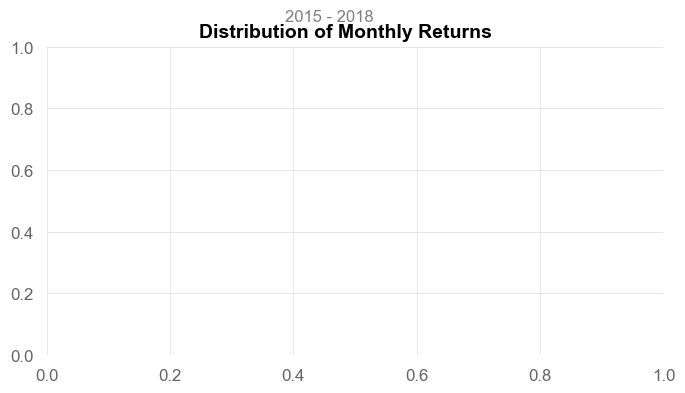

In [33]:
import quantstats as qs

final_portfolio_benchmark.index = pd.to_datetime(final_portfolio_benchmark.index)

qs.reports.full(final_portfolio_benchmark['Strategy'],benchmark = final_portfolio_benchmark['BDP_Close'],mode="full")